In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('graduate_admission1.csv')

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524


In [9]:
df.shape

(1000, 8)

In [10]:
df.info

<bound method DataFrame.info of      GRE Score  TOEFL Score  University Rating  SOP  LOR    GPA  Research  \
0          295           96                  2  4.9   1.7  2.93         0   
1          340          119                  3  4.1   1.7  3.76         0   
2          336           96                  1  3.2   1.8  3.12         1   
3          337          108                  4  3.4   1.3  2.11         0   
4          323           98                  1  1.1   1.3  3.40         0   
..         ...          ...                ...  ...   ...   ...       ...   
995        305          120                  5  4.4   2.0  3.00         1   
996        293          111                  2  2.7   1.7  2.56         1   
997        337          106                  1  4.3   2.5  2.79         0   
998        306          105                  2  2.0   4.1  3.00         0   
999        306           94                  2  1.6   1.5  3.72         1   

     Chance of Admit  
0              0.612  
1              0.708  
2              0.728  
3              0.643  
4              0.524  
..               ...  
995            0.915  
996            0.760  
997            0.583  
998            0.586  
999            0.754  

[1000 rows x 8 columns]>

In [11]:
df.duplicated().sum()

np.int64(0)

In [17]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [18]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
0,295,96,2,4.9,1.7,2.93,0
1,340,119,3,4.1,1.7,3.76,0
2,336,96,1,3.2,1.8,3.12,1
3,337,108,4,3.4,1.3,2.11,0
4,323,98,1,1.1,1.3,3.40,0
...,...,...,...,...,...,...,...
995,305,120,5,4.4,2.0,3.00,1
996,293,111,2,2.7,1.7,2.56,1
997,337,106,1,4.3,2.5,2.79,0
998,306,105,2,2.0,4.1,3.00,0


In [19]:
y

,Chance of Admit
0,0.612
1,0.708
2,0.728
3,0.643
4,0.524
...,...
995,0.915
996,0.760
997,0.583
998,0.586


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()

x_train_scaled = minmax_scale.fit_transform(x_train)
x_test_scaled = minmax_scale.transform(x_test)

In [22]:
x_train_scaled

array([[0.26      , 0.78571429, 0.        , ..., 0.05      , 0.26633166,
        0.        ],
       [0.9       , 0.25      , 0.        , ..., 0.225     , 0.32663317,
        1.        ],
       [0.94      , 0.53571429, 0.75      , ..., 0.05      , 0.84924623,
        0.        ],
       ...,
       [0.84      , 0.82142857, 0.        , ..., 0.3       , 0.21105528,
        1.        ],
       [0.32      , 0.53571429, 0.5       , ..., 0.15      , 0.58291457,
        1.        ],
       [1.        , 0.35714286, 0.        , ..., 0.4       , 0.41708543,
        1.        ]])

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [34]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3794 - val_loss: 1.1285
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0341 - val_loss: 0.8305
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7717 - val_loss: 0.6409
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5779 - val_loss: 0.5164
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4705 - val_loss: 0.4007
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3543 - val_loss: 0.2688
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2310 - val_loss: 0.1277
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1044 - val_loss: 0.0433
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0323 - val_loss: 0.0189
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - val_loss: 0.0139
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - val_loss: 0.0118
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [35]:
y_pred = model.predict(x_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8785274640119902

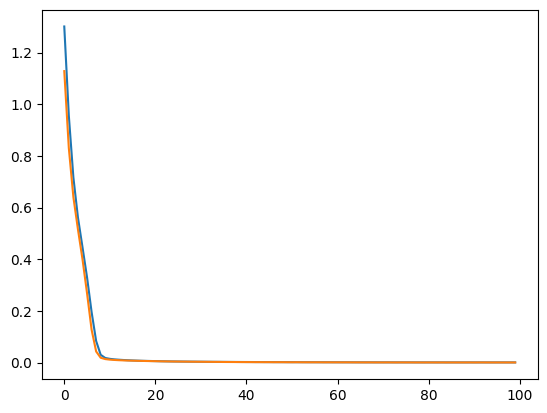

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

